In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt

import sys
from Bio import motifs
from Bio.Seq import Seq

from scipy.stats import pearsonr, spearmanr

In [4]:
snps = pd.read_csv('../output/hyprcoloc_results/ForColoc/snpscores.txt.gz', sep='\t')
hyprcoloc = pd.read_csv('../output/hyprcoloc_results/ForColoc/hyprcoloc.results.txt.gz', sep='\t')
colocalized = pd.read_csv('../output/hyprcoloc_results/ForColoc/hyprcoloc.results.OnlyColocalized.Stats.txt.gz', sep='\t')



In [2]:
def get_intron_SJ(intron):
    intron_ = intron.split(';')[1]
    chrom, start, end, cluster = intron_.split(':')
    strand = cluster.split('_')[-1]
    
    if strand == '+':
        ss5 = (int(start)-2, int(start)+6)
        ss3 = (int(end)-7, int(end)+1)
        
    else:
        ss5 = (int(end)-7, int(end)+1)
        ss3 = (int(start)-2, int(start)+6)
        
    return chrom, strand, ss5, ss3


def get_SJ_bed(intron_list, phenotype):
    
    fh_5ss = open('../../' + phenotype + '.hyprcoloc_5ss.bed', 'w')
    fh_3ss = open('../../' + phenotype + '.hyprcoloc_3ss.bed', 'w')
    
    for intron in intron_list:
        
        chrom, strand, ss5, ss3 = get_intron_SJ(intron)
        
        ss5_row = '\t'.join(['chr' + chrom, str(ss5[0]), str(ss5[1]), intron, '.', strand]) + '\n'
        ss3_row = '\t'.join(['chr' + chrom, str(ss3[0]), str(ss3[1]), intron, '.', strand]) + '\n'
        
        fh_5ss.write(ss5_row)
        fh_3ss.write(ss3_row)
    
        
def get_intron_SJ_extended(intron):
    intron_ = intron.split(';')[1]
    chrom, start, end, cluster = intron_.split(':')
    strand = cluster.split('_')[-1]
    
    if strand == '+':
        ss5 = (int(start)-22, int(start)+26)
        ss3 = (int(end)-27, int(end)+21)
        
    else:
        ss5 = (int(end)-27, int(end)+21)
        ss3 = (int(start)-22, int(start)+26)
        
    return chrom, strand, ss5, ss3


def get_SJ_bed_extended(intron_list, phenotype):
    
    fh_5ss = open('../../' + phenotype + '.hyprcoloc_5ss.extended.bed', 'w')
    fh_3ss = open('../../' + phenotype + '.hyprcoloc_3ss.extended.bed', 'w')
    
    for intron in intron_list:
        
        chrom, strand, ss5, ss3 = get_intron_SJ_extended(intron)
        
        ss5_row = '\t'.join(['chr' + chrom, str(ss5[0]), str(ss5[1]), intron, '.', strand]) + '\n'
        ss3_row = '\t'.join(['chr' + chrom, str(ss3[0]), str(ss3[1]), intron, '.', strand]) + '\n'
        
        fh_5ss.write(ss5_row)
        fh_3ss.write(ss3_row)
    
        
    

In [5]:
splicing_coloc_idx = colocalized.loc[
    [y == 'polyA.Splicing.Subset_YRI' for y in [x.split(';')[0] for x in colocalized.phenotype_full]]
].index

In [53]:
colocaliz

Int64Index([], dtype='int64')

In [56]:
splicing_coloc_idx = colocalized.loc[
    [y == 'polyA.Splicing.Subset_YRI' for y in [x.split(';')[0] for x in colocalized.phenotype_full]]
].index

get_SJ_bed(list(colocalized.loc[splicing_coloc_idx].phenotype_full.unique()), 'polyA.Splicing')
get_SJ_bed_extended(list(colocalized.loc[splicing_coloc_idx].phenotype_full.unique()), 'polyA.Splicing')

splicing_coloc_idx = colocalized.loc[
    [y == 'chRNA.Splicing' for y in [x.split(';')[0] for x in colocalized.phenotype_full]]
].index

get_SJ_bed(list(colocalized.loc[splicing_coloc_idx].phenotype_full.unique()), 'chRNA.Splicing')
get_SJ_bed_extended(list(colocalized.loc[splicing_coloc_idx].phenotype_full.unique()), 'chRNA.Splicing')

bedtools sort -i polyA.Splicing.hyprcoloc_5ss.bed | bedtools getfasta -s -tab -name+ -fi ChromatinSplicingQTLs/code/ReferenceGenome/Fasta/GRCh38.primary_assembly.genome.fa -bed - > polyA.Splicing.hyprcoloc_5ss.sorted.tab

bedtools sort -i polyA.Splicing.hyprcoloc_5ss.extended.bed | bedtools getfasta -s -tab -name+ -fi ChromatinSplicingQTLs/code/ReferenceGenome/Fasta/GRCh38.primary_assembly.genome.fa -bed - > polyA.Splicing.hyprcoloc_5ss.extended.sorted.tab

bedtools sort -i polyA.Splicing.hyprcoloc_3ss.bed | bedtools getfasta -s -tab -name+ -fi ChromatinSplicingQTLs/code/ReferenceGenome/Fasta/GRCh38.primary_assembly.genome.fa -bed - > polyA.Splicing.hyprcoloc_3ss.sorted.tab

bedtools sort -i polyA.Splicing.hyprcoloc_3ss.extended.bed | bedtools getfasta -s -tab -name+ -fi ChromatinSplicingQTLs/code/ReferenceGenome/Fasta/GRCh38.primary_assembly.genome.fa -bed - > polyA.Splicing.hyprcoloc_3ss.extended.sorted.tab


bedtools sort -i chRNA.Splicing.hyprcoloc_5ss.bed | bedtools getfasta -s -tab -name+ -fi ChromatinSplicingQTLs/code/ReferenceGenome/Fasta/GRCh38.primary_assembly.genome.fa -bed - > chRNA.Splicing.hyprcoloc_5ss.sorted.tab

bedtools sort -i chRNA.Splicing.hyprcoloc_5ss.extended.bed | bedtools getfasta -s -tab -name+ -fi ChromatinSplicingQTLs/code/ReferenceGenome/Fasta/GRCh38.primary_assembly.genome.fa -bed - > chRNA.Splicing.hyprcoloc_5ss.extended.sorted.tab

bedtools sort -i chRNA.Splicing.hyprcoloc_3ss.bed | bedtools getfasta -s -tab -name+ -fi ChromatinSplicingQTLs/code/ReferenceGenome/Fasta/GRCh38.primary_assembly.genome.fa -bed - > chRNA.Splicing.hyprcoloc_3ss.sorted.tab

bedtools sort -i chRNA.Splicing.hyprcoloc_3ss.extended.bed | bedtools getfasta -s -tab -name+ -fi ChromatinSplicingQTLs/code/ReferenceGenome/Fasta/GRCh38.primary_assembly.genome.fa -bed - > chRNA.Splicing.hyprcoloc_3ss.extended.sorted.tab

In [39]:
splicing_coloc_idx

Int64Index([   11,    12,    13,    14,    15,    16,    41,    42,    78,
               79,
            ...
            25754, 25764, 25765, 25776, 25777, 25778, 25779, 25780, 25784,
            25785],
           dtype='int64', length=2712)

In [33]:
df = pd.read_csv('../../chRNA.Splicing.hyprcoloc_5ss.sorted.tab', sep='\t', names=['name', 'seq'])

df['seq'] = df['seq'].apply(Seq)

m  = motifs.create(df['seq'])
pwm = m.counts.normalize()
pssm = pwm.log_odds()

df['score'] = df['seq'].apply(pssm.calculate)


df_extended = pd.read_csv('../../chRNA.Splicing.hyprcoloc_5ss.extended.sorted.tab', sep='\t', names=['name', 'seq'])
df_extended['seq'] = df_extended['seq'].apply(Seq)

me  = motifs.create(df_extended['seq'])
pwme = me.counts.normalize()
pssme = pwme.log_odds()

# pssm.calculate(m.consensus)
df_extended['score'] = df_extended['seq'].apply(pssme.calculate)

df.index = [df.name[i].split('::')[0] for i in range(len(df.name))]
df_extended.index = [df_extended.name[i].split('::')[0] for i in range(len(df_extended.name))]

merged_snps = colocalized.merge(snps, left_on='Locus', right_on='Locus')

splicing_idx = merged_snps.loc[
    [y == 'chRNA.Splicing' for y in [x.split(';')[0] for x in merged_snps.phenotype_full]]
].index

In [34]:
def mutate(seq, extended_seq, pos, snp, strand):
    
    chrom, position, original, new = snp.split(':')
    
    if strand == '-':
        seq = get_neg_nucleotide(seq)
        extended_seq = get_neg_nucleotide(extended_seq)
    
    if (len(original) == 1) and (len(new)==1):
        
        assert seq[pos] == original

        nuc = list(seq)
        nuc[pos] = new

        mutated_seq = ''.join(nuc)

        if strand == '-':
            mutated_seq = get_neg_nucleotide(mutated_seq)

        return mutated_seq
    
    else:
        
        if strand == '+':

            assert extended_seq[(pos+20):(pos+len(original)+20)] == original
            
            seq5 = extended_seq[:(pos+20)]
            seq3 = extended_seq[(pos+len(original)+20):]

            mutated_seq = seq5 + new + seq3
            mutated_seq = mutated_seq[20:28]
            
        else:
            
            assert extended_seq[(pos+21-len(original)):(pos+21)][::-1] == original
            
            seq5 = extended_seq[:(pos+21)][::-1]
            seq3 = extended_seq[(pos+21-len(original)):][::-1]
            
            mutated_seq = seq5 + new + seq3
            mutated_seq = get_neg_nucleotide(mutated_seq)[::-1][20:28]
        
        return mutated_seq
        
        
    
def get_neg_nucleotide(S):
    new_S = ''
    for i in range(len(S)):
        N = S[i]
        if N == 'A':
            new_S += 'T'
        elif N == 'T':
            new_S += 'A'
        elif N == 'G':
            new_S += 'C'
        elif N == 'C':
            new_S += 'G'
    return new_S#[::-1]
        

def get_splice_junctions(intron):
    chrom, start, end, clu = intron.split(';')[1].split(':')
    strand = clu.split('_')[-1]
    
    return int(start), int(end), strand


def isSNPin5SS(snp, intron, mut_diff):
    
    snp_pos = int(snp.split(':')[1])
    
    start, end, strand = get_splice_junctions(intron)
    
    seq = str(df.loc[intron].seq)
    extended_seq = str(df_extended.loc[intron].seq)
    
    for i in range(8):
        if strand == '+':
            test_pos = start + i - 1
        else:
            test_pos = end - i + 1
        
        if snp_pos == test_pos:
            mutated_seq = mutate(seq, extended_seq, i, snp, strand)
            mut_diff.append(np.max([pssm.calculate(Seq(mutated_seq)), -10]) - pssm.calculate(Seq(seq)))
            
            return mut_diff
    return mut_diff


def isClusterinSJ(data, snp_x, mut_diff, beta):
    snp_x_data = data.loc[data.snp_x == snp_x]
    
    token = False
    
    snps_sj_pr = []
    snps_no_sj_pr = []
    betas = []
    p = []
    
    for idx in snp_x_data.index:
        
        l = len(mut_diff)
        
        intron = snp_x_data.loc[idx, 'phenotype_full']
        snp_y = snp_x_data.loc[idx, 'snp_y']
        locus = snp_x_data.loc[idx, 'Locus']
        
        mut_diff = isSNPin5SS(snp_y, intron, mut_diff)
        
        if l < len(mut_diff):
            beta.append(snp_x_data.loc[idx, 'beta'])
            
    return mut_diff, beta
        
        

merged_splicing = merged_snps.loc[splicing_idx]

mut_diff = []
beta = []
sig_snp = []

for snp_x in tqdm(merged_splicing.snp_x.unique(), leave=True, position=0):
    l = len(mut_diff)
    mut_diff, beta = isClusterinSJ(merged_splicing, snp_x, mut_diff, beta)
    if len(mut_diff) > l:
        sig_snp.append(snp_x)

100%|██████████| 1150/1150 [00:23<00:00, 49.03it/s]


(-3.0, 3.0)

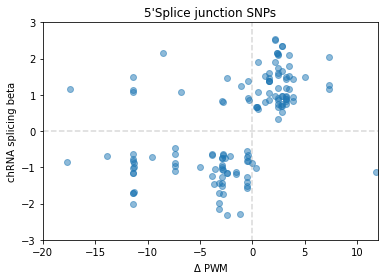

In [32]:
plt.plot([0, 0], [-5, 5], linestyle='--', alpha=0.3, c='gray')
plt.plot([-20, 20], [0, 0], linestyle='--', alpha=0.3, c='gray')
plt.scatter(mut_diff, beta, alpha = 0.5)
plt.xlabel(r'$\Delta$ PWM')
plt.ylabel('chRNA splicing beta')
plt.title("5'Splice junction SNPs")
plt.xlim([-20, 12])
plt.ylim([-3, 3])

(-3.0, 3.0)

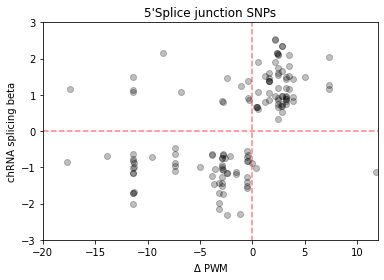

In [13]:
plt.plot([0, 0], [-5, 5], linestyle='--', alpha=0.5, c='red')
plt.plot([-20, 20], [0, 0], linestyle='--', alpha=0.5, c='red')
plt.scatter(mut_diff, beta, alpha = 0.25, c='black')
plt.xlabel(r'$\Delta$ PWM')
plt.ylabel('chRNA splicing beta')
plt.title("5'Splice junction SNPs")
plt.xlim([-20, 12])
plt.ylim([-3, 3])

In [35]:
ch_mut_diff = mut_diff
ch_beta = beta
ch_snp = sig_snp

In [83]:
spearmanr(beta, mut_diff)

SpearmanrResult(correlation=0.6091564922496572, pvalue=1.3959083458530225e-15)

In [82]:
pearsonr(beta, mut_diff)

(0.531826615450316, 1.3659286793794182e-11)

In [36]:
df = pd.read_csv('../../polyA.Splicing.hyprcoloc_5ss.sorted.tab', sep='\t', names=['name', 'seq'])

df['seq'] = df['seq'].apply(Seq)

m  = motifs.create(df['seq'])
pwm = m.counts.normalize()
pssm = pwm.log_odds()

df['score'] = df['seq'].apply(pssm.calculate)


df_extended = pd.read_csv('../../polyA.Splicing.hyprcoloc_5ss.extended.sorted.tab', sep='\t', names=['name', 'seq'])
df_extended['seq'] = df_extended['seq'].apply(Seq)

me  = motifs.create(df_extended['seq'])
pwme = me.counts.normalize()
pssme = pwme.log_odds()

# pssm.calculate(m.consensus)
df_extended['score'] = df_extended['seq'].apply(pssme.calculate)

df.index = [df.name[i].split('::')[0] for i in range(len(df.name))]
df_extended.index = [df_extended.name[i].split('::')[0] for i in range(len(df_extended.name))]

merged_snps = colocalized.merge(snps, left_on='Locus', right_on='Locus')

splicing_idx = merged_snps.loc[
    [y == 'polyA.Splicing.Subset_YRI' for y in [x.split(';')[0] for x in merged_snps.phenotype_full]]
].index

In [37]:
def mutate(seq, extended_seq, pos, snp, strand):
    
    chrom, position, original, new = snp.split(':')
    
    if strand == '-':
        seq = get_neg_nucleotide(seq)
        extended_seq = get_neg_nucleotide(extended_seq)
    
    if (len(original) == 1) and (len(new)==1):
        
        assert seq[pos] == original

        nuc = list(seq)
        nuc[pos] = new

        mutated_seq = ''.join(nuc)

        if strand == '-':
            mutated_seq = get_neg_nucleotide(mutated_seq)

        return mutated_seq
    
    else:
        
        if strand == '+':

            assert extended_seq[(pos+20):(pos+len(original)+20)] == original
            
            seq5 = extended_seq[:(pos+20)]
            seq3 = extended_seq[(pos+len(original)+20):]

            mutated_seq = seq5 + new + seq3
            mutated_seq = mutated_seq[20:28]
            
        else:
            
            assert extended_seq[(pos+21-len(original)):(pos+21)][::-1] == original
            
            seq5 = extended_seq[:(pos+21)][::-1]
            seq3 = extended_seq[(pos+21-len(original)):][::-1]
            
            mutated_seq = seq5 + new + seq3
            mutated_seq = get_neg_nucleotide(mutated_seq)[::-1][20:28]
        
        return mutated_seq
        
        
    
def get_neg_nucleotide(S):
    new_S = ''
    for i in range(len(S)):
        N = S[i]
        if N == 'A':
            new_S += 'T'
        elif N == 'T':
            new_S += 'A'
        elif N == 'G':
            new_S += 'C'
        elif N == 'C':
            new_S += 'G'
    return new_S#[::-1]
        

def get_splice_junctions(intron):
    chrom, start, end, clu = intron.split(';')[1].split(':')
    strand = clu.split('_')[-1]
    
    return int(start), int(end), strand


def isSNPin5SS(snp, intron, mut_diff):
    
    snp_pos = int(snp.split(':')[1])
    
    start, end, strand = get_splice_junctions(intron)
    
    seq = str(df.loc[intron].seq)
    extended_seq = str(df_extended.loc[intron].seq)
    
    for i in range(8):
        if strand == '+':
            test_pos = start + i - 1
        else:
            test_pos = end - i + 1
        
        if snp_pos == test_pos:
            mutated_seq = mutate(seq, extended_seq, i, snp, strand)
            mut_diff.append(np.max([pssm.calculate(Seq(mutated_seq)), -10]) - pssm.calculate(Seq(seq)))
            
            return mut_diff
    return mut_diff


def isClusterinSJ(data, snp_x, mut_diff, beta):
    snp_x_data = data.loc[data.snp_x == snp_x]
    
    token = False
    
    snps_sj_pr = []
    snps_no_sj_pr = []
    betas = []
    p = []
    
    for idx in snp_x_data.index:
        
        l = len(mut_diff)
        
        intron = snp_x_data.loc[idx, 'phenotype_full']
        snp_y = snp_x_data.loc[idx, 'snp_y']
        locus = snp_x_data.loc[idx, 'Locus']
        
        mut_diff = isSNPin5SS(snp_y, intron, mut_diff)
        
        if l < len(mut_diff):
            beta.append(snp_x_data.loc[idx, 'beta'])
            
    return mut_diff, beta
        
        

merged_splicing = merged_snps.loc[splicing_idx]

mut_diff = []
beta = []

sig_snp = []

for snp_x in tqdm(merged_splicing.snp_x.unique(), leave=True, position=0):
    l = len(mut_diff)
    mut_diff, beta = isClusterinSJ(merged_splicing, snp_x, mut_diff, beta)
    if len(mut_diff) > l:
        sig_snp.append(snp_x)

100%|██████████| 1018/1018 [00:16<00:00, 59.99it/s]


In [94]:
len(beta)

117

(-3.0, 3.0)

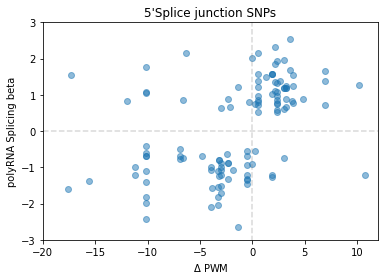

In [38]:
plt.plot([0, 0], [-5, 5], linestyle='--', alpha=0.3, c='gray')
plt.plot([-20, 20], [0, 0], linestyle='--', alpha=0.3, c='gray')
plt.scatter(mut_diff, beta, alpha = 0.5)
plt.xlabel(r'$\Delta$ PWM')
plt.ylabel('polyRNA Splicing beta')
plt.title("5'Splice junction SNPs")
plt.xlim([-20, 12])
plt.ylim([-3, 3])

(-3.0, 3.0)

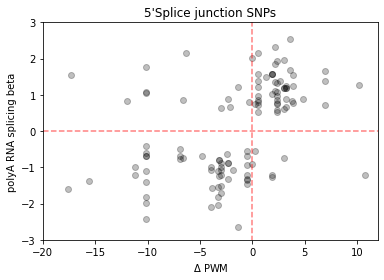

In [44]:
plt.plot([0, 0], [-5, 5], linestyle='--', alpha=0.5, c='red')
plt.plot([-20, 20], [0, 0], linestyle='--', alpha=0.5, c='red')
plt.scatter(mut_diff, beta, alpha = 0.25, c='black')
plt.xlabel(r'$\Delta$ PWM')
plt.ylabel('polyA RNA splicing beta')
plt.title("5'Splice junction SNPs")
plt.xlim([-20, 12])
plt.ylim([-3, 3])

In [96]:
from scipy.stats import pearsonr, spearmanr

In [18]:
pearsonr(mut_diff, beta)

(0.4433842368622213, 5.542722642269713e-07)

In [98]:
spearmanr(mut_diff, beta)

SpearmanrResult(correlation=0.5399405524463241, pvalue=3.3341072928725283e-10)

In [19]:
pearsonr(ch_mut_diff, ch_beta)

(0.531826615450316, 1.3659286793794182e-11)

In [45]:
spearmanr(ch_mut_diff, ch_beta)

SpearmanrResult(correlation=0.6091564922496572, pvalue=1.3959083458530225e-15)

In [42]:
ch = []
po = []

for i in range(len(sig_snp)):
    if sig_snp[i] in ch_snp:
        po.append(beta[i])
        
        j = ch_snp.index(sig_snp[i])
        ch.append(ch_beta[j])

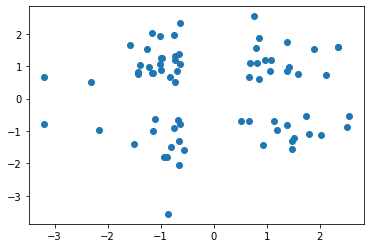

In [43]:
plt.scatter(ch, po)

In [24]:
ch_snp.index(sig_snp[1])

ValueError: '17:48069291:T:A' is not in list

In [21]:
sig_snp

['7:1998126:G:A',
 '17:48069291:T:A',
 '7:8176225:T:C',
 '2:201141373:G:A',
 '12:21501473:G:A',
 '2:75717401:C:T',
 '17:50547162:A:C',
 '17:12945405:T:C',
 '19:41565563:C:CACAG',
 '19:41586462:A:T',
 '19:41585872:G:A',
 '1:112546384:C:T',
 '16:601115:G:T',
 '1:1718040:T:TAG',
 '1:1689465:A:G',
 '12:16350855:T:G',
 '1:209758952:T:A',
 '1:209806682:C:T',
 '12:4605916:G:A',
 '7:38225578:CTTGAAAAGA:C',
 '3:52532898:C:A',
 '6:111842871:G:A',
 '17:51166498:G:A',
 '3:45474257:G:A',
 '3:45399578:CT:C',
 '16:21186745:T:C',
 '19:35338353:G:A',
 '6:53250392:T:C',
 '4:6609511:TG:T',
 '17:44316094:A:C',
 '16:29815217:T:C',
 '7:151336542:T:C',
 '12:31081986:A:G',
 '4:1744043:A:G',
 '10:99685834:A:C',
 '2:32678481:G:A',
 '1:24924042:CA:C',
 '10:112445631:G:A',
 '11:505006:G:C',
 '11:502217:C:T',
 '22:50526017:A:T',
 '6:26426755:CT:C',
 '12:95237500:T:C',
 '12:27416246:C:T',
 '12:27379288:C:T',
 '6:155242154:C:T',
 '17:44346476:T:G',
 '3:119309457:C:T',
 '6:49379837:G:A',
 '1:109283514:C:T',
 '13:2068

In [57]:
df = pd.read_csv('../../hyprcoloc_output_old/hyprcoloc_3ss.sorted.tab', sep='\t', names=['name', 'seq'])

df['seq'] = df['seq'].apply(Seq)

m  = motifs.create(df['seq'])
pwm = m.counts.normalize()
pssm = pwm.log_odds()

df['score'] = df['seq'].apply(pssm.calculate)


df_extended = pd.read_csv('../../hyprcoloc_output_old/hyprcoloc_3ss.extended.sorted.tab', sep='\t', names=['name', 'seq'])
df_extended['seq'] = df_extended['seq'].apply(Seq)

me  = motifs.create(df_extended['seq'])
pwme = me.counts.normalize()
pssme = pwme.log_odds()

# pssm.calculate(m.consensus)
df_extended['score'] = df_extended['seq'].apply(pssme.calculate)

df.index = [df.name[i].split('::')[0] for i in range(len(df.name))]
df_extended.index = [df_extended.name[i].split('::')[0] for i in range(len(df_extended.name))]

In [70]:
def mutate(seq, extended_seq, pos, snp, strand):
    
    
    chrom, position, original, new = snp.split(':')
    
    if strand == '-':
        seq = get_neg_nucleotide(seq)
        extended_seq = get_neg_nucleotide(extended_seq)
    
    if (len(original) == 1) and (len(new)==1):
        
        assert seq[pos] == original

        nuc = list(seq)
        nuc[pos] = new

        mutated_seq = ''.join(nuc)

        if strand == '-':
            mutated_seq = get_neg_nucleotide(mutated_seq)

        return mutated_seq
    
    else:
        
        if strand == '+':

            assert extended_seq[(pos+20):(pos+len(original)+20)] == original
            
            seq5 = extended_seq[:(pos+20)]
            seq3 = extended_seq[(pos+len(original)+20):]

            mutated_seq = seq5 + new + seq3
            mutated_seq = mutated_seq[20:28]
            
        else:
            
            assert extended_seq[(pos+21-len(original)):(pos+21)][::-1] == original
            
            seq5 = extended_seq[:(pos+21)][::-1]
            seq3 = extended_seq[(pos+21-len(original)):][::-1]
            
            mutated_seq = seq5 + new + seq3
            mutated_seq = get_neg_nucleotide(mutated_seq)[::-1][20:28]
        
        return mutated_seq
        
        
    
def get_neg_nucleotide(S):
    new_S = ''
    for i in range(len(S)):
        N = S[i]
        if N == 'A':
            new_S += 'T'
        elif N == 'T':
            new_S += 'A'
        elif N == 'G':
            new_S += 'C'
        elif N == 'C':
            new_S += 'G'
    return new_S#[::-1]
        

def get_splice_junctions(intron):
    chrom, start, end, clu = intron.split(';')[1].split(':')
    strand = clu.split('_')[-1]
    
    return int(start), int(end), strand


def isSNPin3SS(snp, intron, mut_diff):
    
    snp_pos = int(snp.split(':')[1])
    
    start, end, strand = get_splice_junctions(intron)
    
    seq = str(df.loc[intron].seq)
    extended_seq = str(df_extended.loc[intron].seq)
    
    for i in range(8):
        if strand == '+':
            test_pos = end + i - 6
        else:
            test_pos = start - i + 6
        
        if snp_pos == test_pos:
            mutated_seq = mutate(seq, extended_seq, i, snp, strand)
            
            mut_diff.append(np.max([pssm.calculate(Seq(mutated_seq)), -10]) - pssm.calculate(Seq(seq)))
            
            return mut_diff
    return mut_diff


def isClusterinSJ(data, snp_x, mut_diff, beta):
    snp_x_data = data.loc[data.snp_x == snp_x]
    
    token = False
    
    snps_sj_pr = []
    snps_no_sj_pr = []
    betas = []
    p = []
    
    for idx in snp_x_data.index:
        
        l = len(mut_diff)
        
        intron = snp_x_data.loc[idx, 'phenotype_full']
        snp_y = snp_x_data.loc[idx, 'snp_y']
        locus = snp_x_data.loc[idx, 'Locus']
        
        mut_diff = isSNPin3SS(snp_y, intron, mut_diff)
        
        if l < len(mut_diff):
            beta.append(snp_x_data.loc[idx, 'beta'])
            
    return mut_diff, beta
        
        

merged_splicing = merged_snps.loc[splicing_idx]

mut_diff = []
beta = []

for snp_x in tqdm(merged_splicing.snp_x.unique(), leave=True, position=0):
    
    mut_diff, beta = isClusterinSJ(merged_splicing, snp_x, mut_diff, beta)
    

100%|██████████| 727/727 [00:11<00:00, 63.66it/s] 


(-3.0, 3.0)

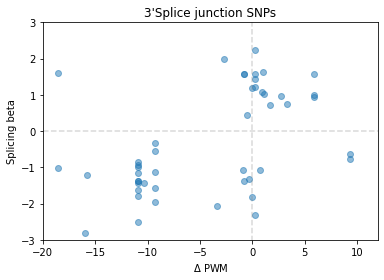

In [73]:
plt.plot([0, 0], [-5, 5], linestyle='--', alpha=0.3, c='gray')
plt.plot([-20, 20], [0, 0], linestyle='--', alpha=0.3, c='gray')
plt.scatter(mut_diff, beta, alpha = 0.5)
plt.xlabel(r'$\Delta$ PWM')
plt.ylabel('Splicing beta')
plt.title("3'Splice junction SNPs")
plt.xlim([-20, 12])
plt.ylim([-3, 3])

In [78]:
spearmanr(mut_diff, beta)

SpearmanrResult(correlation=0.4841384035276617, pvalue=0.000564699402360845)